In [2]:
#importing all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
#Loading the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
#viewing the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#making the temporary dataframe
x = iris_df.iloc[:,:].values

In [16]:
#finding the optimum number of k 
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,15)
for k in K :
    km = KMeans(n_clusters = k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\Preeti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method for optimal k')

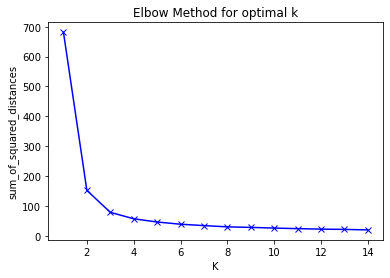

In [17]:
#plotting the sum_of_squared_distances against number of k 
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for optimal k')


### using elbow method we conclude that optimum number of K is 3

In [18]:
#prediction 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 101)
y_kmeans = kmeans.fit_predict(x)

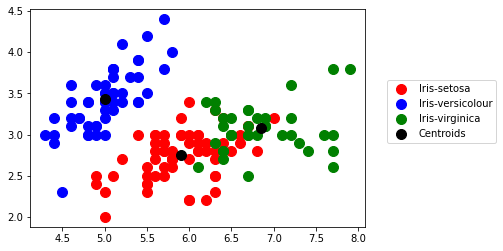

In [25]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend(bbox_to_anchor = (1.05,0.7))